In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Fish.csv')

In [3]:
dataset.shape

(159, 7)

In [4]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


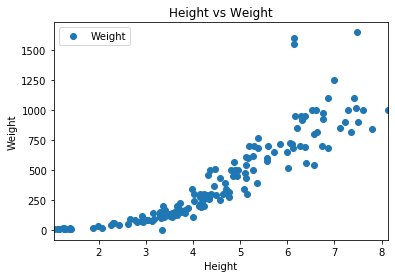

In [44]:
dataset.plot(x='Width', y='Weight', style='o')  
plt.title('Height vs Weight')  
plt.xlabel('Height')  
plt.ylabel('Weight')  
plt.show()

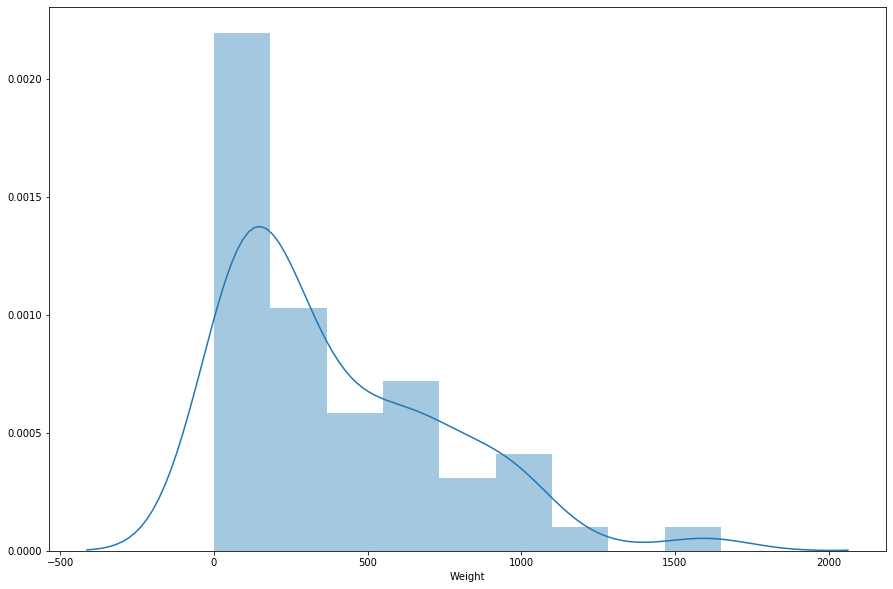

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Weight'])

In [12]:
X = dataset['Height'].values.reshape(-1,1)
y = dataset['Weight'].values.reshape(-1,1)
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-143.55005886]
[[60.70692716]]


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,180.0,286.655651
1,9.8,-9.727709
2,690.0,498.225363
3,820.0,532.421575
4,100.0,173.485798
5,19.7,30.848801
6,7.0,-38.624206
7,840.0,553.875403
8,197.0,254.748090
9,250.0,298.566350


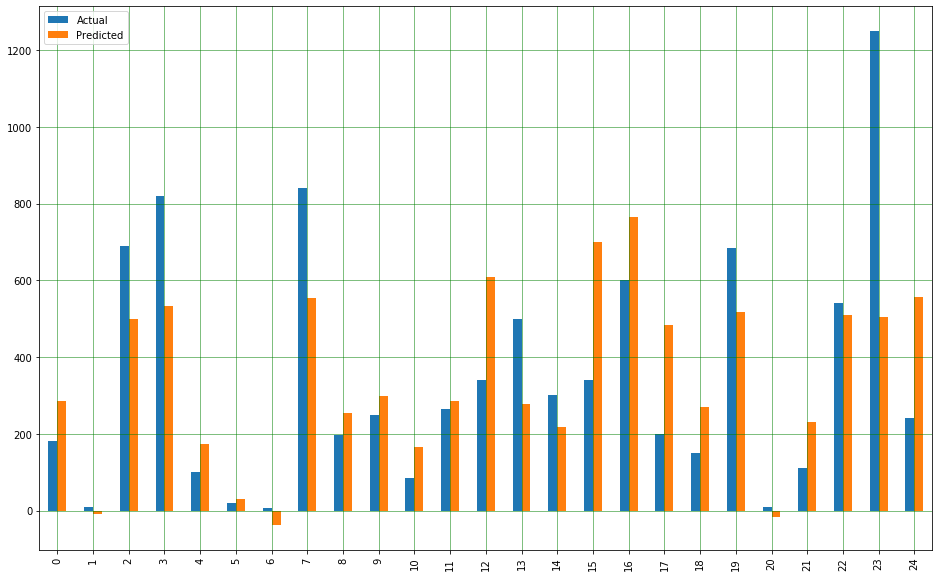

In [20]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

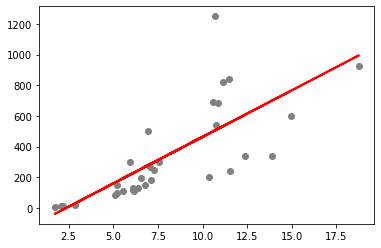

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 213.8791852094745
Mean Squared Error: 117837.06993210356
Root Mean Squared Error: 343.2740449438372


## Multiple Linear Regression

In [22]:
X = dataset[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = dataset['Weight']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Length1,26.071502
Length2,32.061628
Length3,-32.938487
Height,29.248519
Width,25.148864


In [26]:
y_pred = regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [28]:
df1

,Actual,Predicted
7,390.0,469.356879
92,150.0,207.378883
42,120.0,112.384809
153,9.8,-207.222246
157,19.7,-109.772287
106,250.0,391.306663
61,55.0,-9.171031
44,145.0,174.925989
120,900.0,824.265382
67,170.0,207.702836


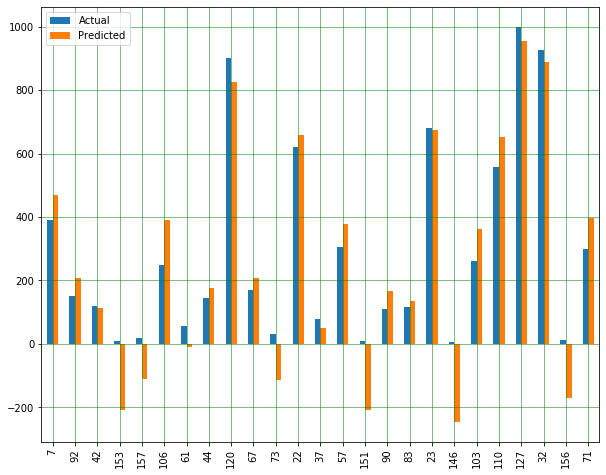

In [29]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 87.80341740219512
Mean Squared Error: 12573.085919903162
Root Mean Squared Error: 112.12977267391192


### Data transform

In [31]:
X = dataset[['Species','Length1', 'Length2', 'Length3', 'Height', 'Width']]

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(X['Species'])
encoder.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [33]:
X['Species'] = encoder.transform(X['Species'])
X['Species'].value_counts()

c:\users\naomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: Species, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=X['Species'])

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (119, 6), X_test shape: (40, 6)


In [35]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = regressor.predict(X_test)

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df.head(25)

In [38]:
df2

,Actual,Predicted
98,188.0,241.965958
71,300.0,402.597184
1,290.0,336.666847
8,450.0,494.586929
31,955.0,845.295696
54,390.0,543.718529
11,500.0,538.331154
113,700.0,707.924753
156,12.2,-107.918819
61,55.0,-26.179316


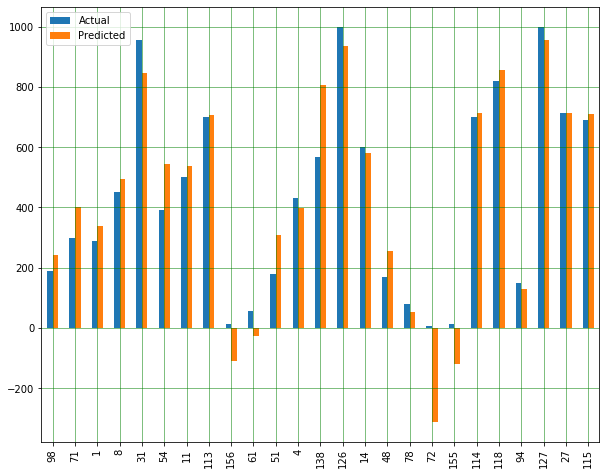

In [39]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 84.6473187258895
Mean Squared Error: 14393.794486602777
Root Mean Squared Error: 119.9741409079589


## Non-Linear Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_regr = RandomForestRegressor(n_estimators=2, max_depth=3)
rf_regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)